In [1]:
# Import required libraries
import pandas as pd
import numpy as np
 
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import pandasql as psql

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
#from itertools import cycle

from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Load the 'letter recognition' dataset

lettersdata = pd.read_csv(r"letter-recognition.csv", header=0)
lettersdata.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
# Display the dataset information

lettersdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
# Get the sub-set of data for letters A, B, P & R

lettersdata_N = psql.sqldf("select * \
                           from lettersdata \
                           where letter in ('A', 'B', 'P' , 'R')")
                          
lettersdata_N.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
1,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
2,R,5,9,5,7,6,6,11,7,3,7,3,9,2,7,5,11
3,B,5,9,7,7,10,9,8,4,4,6,8,6,6,11,8,7
4,P,3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8


In [5]:
# Display the new 'letter_recognition' data information

lettersdata_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116 entries, 0 to 3115
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  3116 non-null   object
 1   xbox    3116 non-null   int64 
 2   ybox    3116 non-null   int64 
 3   width   3116 non-null   int64 
 4   height  3116 non-null   int64 
 5   onpix   3116 non-null   int64 
 6   xbar    3116 non-null   int64 
 7   ybar    3116 non-null   int64 
 8   x2bar   3116 non-null   int64 
 9   y2bar   3116 non-null   int64 
 10  xybar   3116 non-null   int64 
 11  x2ybar  3116 non-null   int64 
 12  xy2bar  3116 non-null   int64 
 13  xedge   3116 non-null   int64 
 14  xedgey  3116 non-null   int64 
 15  yedge   3116 non-null   int64 
 16  yedgex  3116 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 414.0+ KB


In [6]:
# Display the count of each letter

lettersdata_N['letter'].value_counts(sort=False)

B    766
A    789
R    758
P    803
Name: letter, dtype: int64

In [7]:
# Identify the independent and Target variables

IndepVar = []
for col in lettersdata_N.columns:
    if col != 'letter':
        IndepVar.append(col)

TargetVar = 'letter'

x = lettersdata_N[IndepVar]
y = lettersdata_N[TargetVar]

In [8]:
# Import LabelEncoder and convert the target variable from object to integer values

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#creating labelEncoder

le = preprocessing.LabelEncoder()

# Converting string labels into numbers.

y=le.fit_transform(y)

y=pd.DataFrame(y)

In [9]:
# Display the Target values after labelEncoder

y.value_counts(sort=False)

0    789
1    766
2    803
3    758
dtype: int64

In [10]:
# Split into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

# Copy the test data to back-up file

x_test_F1 = x_test.copy()

In [11]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression
from math import sqrt

modelLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                             intercept_scaling=1, max_iter=100, multi_class='auto', 
                             n_jobs=None, penalty='l2', random_state=None,
                             solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

# Train the model with train dataset

modelLR = modelLR.fit(x_train,y_train)

# Predict the model with test data set

y1_pred = modelLR.predict(x_test)
y1_pred_proba = modelLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y1_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y1_pred

# Class = Label 0-3

lst_classes = [0, 1, 2, 3]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}\n".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    x = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(x), 3)
    
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}\n".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[191   0   2   1]
 [  3 176   3  17]
 [  0   1 194   0]
 [  6  10   6 169]]
Print Class: 0

TP=191, FP=9, TN=576, FN=3
Accuracy: 0.985
Precision: 0.955
Sensitivity: 0.985
F1-Score: 0.97
Specificity: 0.985
Balanced Accuracy: 0.985

MCC: 0.959

Print Class: 1

TP=176, FP=11, TN=569, FN=23
Accuracy: 0.956
Precision: 0.941
Sensitivity: 0.884
F1-Score: 0.912
Specificity: 0.981
Balanced Accuracy: 0.932

MCC: 0.884

Print Class: 2

TP=194, FP=11, TN=573, FN=1
Accuracy: 0.985
Precision: 0.946
Sensitivity: 0.995
F1-Score: 0.97
Specificity: 0.981
Balanced Accuracy: 0.988

MCC: 0.96

Print Class: 3

TP=169, FP=18, TN=570, FN=22
Accuracy: 0.949
Precision: 0.904
Sensitivity: 0.885
F1-Score: 0.894
Specificity: 0.969
Balanced Accuracy: 0.927

MCC: 0.86



In [12]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean() 

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall Performance Prediction:
Accuracy: 96.875%
Precision: 93.65%
Recall or Sensitivity: 93.725%
F1-Score: 0.9365
Specificity or True Nagative Rate: 97.9%
Balanced Accuracy: 95.8%

MCC: 0.9158



In [13]:
# fit OneVsRestClassifier model to calculate the ROC AUC and plot ROC curve

from sklearn.multiclass import OneVsRestClassifier

modelORC = OneVsRestClassifier(LogisticRegression())
modelORC.fit(x_train, y_train)
y1_pred = modelORC.predict(x_test)
y1_pred_proba = modelORC.predict_proba(x_test)
print(y1_pred_proba)

[[1.86115701e-07 8.57222423e-01 4.94317137e-04 1.42283074e-01]
 [4.07722366e-08 7.65876908e-05 9.87750854e-01 1.21725171e-02]
 [4.52632845e-05 3.72874602e-04 9.99493388e-01 8.84741271e-05]
 ...
 [6.79108459e-08 9.96163191e-06 9.72276869e-01 2.77131014e-02]
 [9.79324811e-01 1.82311444e-05 5.49813157e-04 2.01071443e-02]
 [2.20014762e-07 9.70358317e-08 9.93777089e-01 6.22259380e-03]]


In [14]:
# ROC curve for multiple classes

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y1_pred_proba[:,i], pos_label=i)

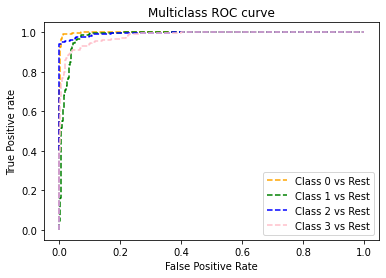

In [15]:
# Plotting  ROC curves for all classes    

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('Multiclass ROC',dpi=300); 

In [16]:
#ROC AUC score

ROC_AUC_Score = roc_auc_score(y_test, y1_pred_proba, multi_class='ovr', average='weighted')
print('ROC Score :', ROC_AUC_Score)

ROC Score : 0.9897560465087424


# Bagging Classifier Algorithm

In [17]:
# Training bagging classifier - BaggingClassifier class of 'sklearn.ensemble' packages to build bagging classifier model. 
# We set LogisticRegression as a base estimator and set 100 to the number of estimators, then train the model 
# with train data. 

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                             intercept_scaling=1, max_iter=100, multi_class='auto', 
                             n_jobs=None, penalty='l2', random_state=None,
                             solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

modelBAG = BaggingClassifier(base_estimator=modelLR,
                             n_estimators=100, # number of LR models to create
                             max_samples=1.0, # each model is trained from randomly sampled 1 instance
                             max_features=1.0,
                             bootstrap=True, # set to False to use Pasting instead of Bagging
                             bootstrap_features=False,
                             oob_score=False,
                             warm_start=False,
                             n_jobs=None,
                             random_state=None,
                             verbose=0)

# Train the model with train dataset

modelBAG.fit(x_train,y_train)

# Predict model with test data 

y2_pred = modelBAG.predict(x_test)
y2_pred_proba = modelBAG.predict_proba(x_test)

In [18]:
# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y2_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y2_pred

# Class = Label 0-3

lst_classes = [0, 1, 2, 3]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    x = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(x), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[190   0   2   1]
 [  3 177   3  16]
 [  0   1 194   0]
 [  7   9   6 170]]
Print Class: 0
TP=190, FP=3, TN=576, FN=10
Accuracy: 0.983
Precision: 0.984
Sensitivity: 0.95
F1-Score: 0.967
Specificity: 0.995
Balanced Accuracy: 0.972
MCC: 0.956

Print Class: 1
TP=177, FP=22, TN=570, FN=10
Accuracy: 0.959
Precision: 0.889
Sensitivity: 0.947
F1-Score: 0.917
Specificity: 0.963
Balanced Accuracy: 0.955
MCC: 0.891

Print Class: 2
TP=194, FP=1, TN=573, FN=11
Accuracy: 0.985
Precision: 0.995
Sensitivity: 0.946
F1-Score: 0.97
Specificity: 0.998
Balanced Accuracy: 0.972
MCC: 0.96

Print Class: 3
TP=170, FP=22, TN=570, FN=17
Accuracy: 0.95
Precision: 0.885
Sensitivity: 0.909
F1-Score: 0.897
Specificity: 0.963
Balanced Accuracy: 0.936
MCC: 0.864



In [19]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean() 

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore)*100, 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall Performance Prediction:
Accuracy: 96.925%
Precision: 93.825%
Recall or Sensitivity: 93.8%
F1-Score: 93.775
Specificity or True Nagative Rate: 97.975%
Balanced Accuracy: 95.875%

MCC: 0.9178



In [20]:
Overall Performance Prediction:
Accuracy: 96.95%
Precision: 93.8%
Recall or Sensitivity: 93.85%
F1-Score: 0.938
Specificity or True Nagative Rate: 97.95%
Balanced Accuracy: 95.9%

MCC: 0.9175

SyntaxError: invalid syntax (10310917.py, line 1)

In [21]:
# Fit OneVsRestClassifier model to calculate ROC AUC score and plot ROC curves 

from sklearn.multiclass import OneVsRestClassifier

modelORC = OneVsRestClassifier(BaggingClassifier(base_estimator=modelLR,
                               n_estimators=10, # number of SVC models to create
                               max_samples=1.0, # each model is trained from randomly sampled 1 instance
                               max_features=1.0,
                               bootstrap=True, # set to False to use Pasting instead of Bagging
                               bootstrap_features=False,
                               oob_score=False,
                               warm_start=False,
                               n_jobs=None,
                               random_state=None,
                               verbose=0))
modelORC.fit(x_train, y_train)
pred = modelORC.predict(x_test)
pred_prob = modelORC.predict_proba(x_test)

In [22]:
# roc curve for classes

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

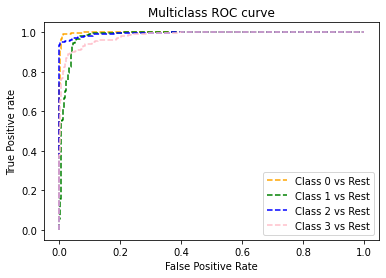

In [23]:
# Plotting  ROC curves for all classes    

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('Multiclass ROC',dpi=300); 

In [24]:
#ROC AUC score

ROC_AUC_Score = roc_auc_score(y_test, y2_pred_proba, multi_class='ovr', average='weighted')
print('ROC Score :', ROC_AUC_Score)

ROC Score : 0.9937402509549735
